<div style="float:left">
            <h1 style="width:450px">Practical 1: Getting Started</h1>
            <h2 style="width:450px">Getting to grips with Jupyter, Git and Markdown</h2>
</div>
<div style="float:right"><img width="100" src="https://jreades.github.io/fsds/img/casa_logo.jpg" /></div>

This week’s practical is focussed on getting you set up with the tools and accounts that you’ll need to across many of the CASA modules in Terms 1 and 2, and familiarising you with ‘how people do data science’. Outside of academia, it’s rare to find a data scientist who works entirely on their own: most code is collaborative, as is most analysis! But collaborating effectively requires tools that: get out of the way of doing ‘stuff’; support teams in negotating conflicts in code; make it easy to share results; and make it easy to ensure that everyone is ‘on the same page’.

<div class="alert alert-class alert-warning">
<b>&#9888; On Windows</b>: please use <b>Power Shell</b> instead of the <b>Command Prompt</b> (cmd). Power Shell behaves much more like the Terminal in macOS and Linux, so the results are more consistent and easier to 'debug'.
</div>

## Task 0: Installing the Tools

If you haven't done this already, you need to follow the instructions for installing all of the tools listed on on the [CASA Computing Environment](https://jreades.github.io/sds_env/setup/install_fest.html) web page. This process will take time, so please keep reading or work on other things to do while you wait!

<div class="alert alert-block alert-info">
<b>&#9888; Tip:</b> if you need help understanding how to use the Command Line or want to be able to do <i>much more</i> there are a wide range of tutorials out there (see below).
</div>

Here are some starting points for learning more:
    
- **I need help understanding**: [Software Carpentries](https://software-carpentry.org/lessons/index.html) is your friend! They have an entire tutorial titled [The Unix Shell](https://swcarpentry.github.io/shell-novice/).
- **I *still* need help understanding**: the [Programming Historian](https://programminghistorian.org/) is another good place to look! And they _also_ have an entire tutorial titled [An Introduction to Bash](https://programminghistorian.org/en/lessons/intro-to-bash).
- **I want to do *more* on the Command Line**: O'Reilly has produced an online book called [Data Science at the Command Line](https://datascienceatthecommandline.com/2e/chapter-2-getting-started.html) that will take you much, much further.

## Task 1: Running Docker

### 1.1 Starting Up 'Right'

One of the most confusing things about starting a Docker container with a "local volume mount" (i.e. a location on your computer that Docker *connects* to the container's file system) is that it seems like magic and it's often hard to understand why you're seeing what you are under the `work` directory.

So *before you do anything else* please spend a minute in the Terminal (macOS) or Power Shell (Windows) learning how to get to your home directory and, below that, to a CASA directory where you can store your work and keep Docker from accessing data that it shouldn't.

On both a Mac and a PC you should be able to run the following:

1. `echo $(pwd)` -- this should print out the location where the Terminal/Power Shell 'started'.
3. `cd $HOME` -- this should take you to your user's *home* directory (on a Mac it will be `/Users/<your username>`, on a PC it will be something like `C:\Users\<your username>`). *Hint: `cd` means 'change directory'!*
4. `cd Documents` -- this will move you into your 'Documents' folder. *Note: on Windows this **might** be called `My\ Documents` and note the "\" in the name! If you have set up your computer in another language this might be called something else, but Power Shell still 'knows' which folder should contain your documents.*
5. `mkdir casa` -- this will create a `casa` folder in your home directory.
6. `cd casa` -- you are now changing into the `casa` directory.
7. `echo $pwd` -- this should show you the 'full path' to your new `casa` directory (e.g. `/Users/<your username>/Documents/casa` or something like that).

We're going to start the container here in Task 1.3 using `docker run...`.

Perhaps a video will help clarify?

<div style="width:500px">
    <a href="https://www.youtube.com/embed/5IkwUrYTY78">
        <img style="width:500px" alt="Docker and You" src="./img/Docker_and_You.png" />
    </a>
</div>

### 1.2 Configuring the SDS2023 Image

During the '[install festival](https://jreades.github.io/sds_env/setup/install_fest.html)' you should have installed Docker and, time permitting, 'pulled' the image appropriate to your system. If you haven't, then you should do so as a priority *now* using either:

On Windows or Intel Macs:
```bash
docker pull jreades/sds:2023
```
or M1 or M2 Macs:
```bash
docker pull jreades/sds:2023-silicon
```
This command is run either in the macOS **`Terminal`** application (in the Utilties directory of your Applications folder) or using the Windows **`Power Shell`** (_not_ the Command Prompt). 

We'd _strongly_ encourage you to ensure that you're able to run Docker and use one of the above images as soon as possible so that we have as long as possible to help you over any hurdles before we get to week 3 where it will be essential that you are running the environment successfully. In our experience, the students who put off trying to get the environment running end up falling quickly behind as they are unable to complete basic tasks successfully. 

### 1.3 Running Docker

By default, the best way to start Docker is from the Terminal or Power Shell.

#### On Windows

Using the Power Shell copy and paste the following *all on one line*:

```bash
docker run --rm -d --name sds2023 -p 8888:8888 -v "$(pwd):/home/jovyan/work" jreades/sds:2023 start.sh jupyter lab --LabApp.password='' --ServerApp.password='' --NotebookApp.token=''
```
<div class="alert alert-class alert-warning">
<b>&#9888; On Windows</b>: <tt>$(pwd)</tt> is actually a <em>command</em>, you are asking the Power Shell to use the <i>current working directory</i> (<tt>pwd</tt> == <i>print wording directory</i>) as the 'mount point' for the <tt>work</tt> directory. The Command Prompt doesn't support <tt>pwd</tt>, but the Power Shell <i>should</i>. You can check this by simply typing <tt>pwd</tt> and hitting enter (&#9166;) to see if you get an error.
</div>

#### On macOS

Using the Terminal or iTerm2 copy and past the following::

```bash
docker run --rm -d --name sds2023 -p 8888:8888 \
   -v "$(pwd):/home/jovyan/work" \
  jreades/sds:2023 start.sh jupyter lab \
  --LabApp.password='' --ServerApp.password='' --NotebookApp.token=''
```

<div class="alert alert-block alert-success">
<b>&#128161; M1/M2 Macs</b>: remember to add <tt>-silicon</tt> to the image name: <tt>jreades/sds:2023-silicon</tt>
</div>


### 1.4 How do I Know it Worked?

With Docker running, you will _mainly_ interact with Python through a web page (unless you choose the VSCode IDE). To check if it's running, we just have to visit the web page and see what happens.

It is likely that the page you want is: [http://localhost:8888/lab/tree/work/](http://localhost:8888/lab/tree/work/). We'll talk more about exactly what is going on next week as well, but this should show you a page that looks something like this (probably with fewer files listed on the left-hand side):

![Screenshot of Jupyter Lab](https://github.com/jreades/fsds/raw/master/practicals/img/1.8-Jupyter_Lab.png)

<div class="alert alert-block alert-success">
<b>&#128161; Note:</b> once you have started a Docker container using any of the above, the machine <b>will continue running</b> until you either restart the computer or tell Docker to stop the container. This <i>can</i> consume memory and battery power indefinitely.
</div>

## Task 2: Organising Your Workspace

Before we start trying to code, I'd suggest organising a 'workspace' on your computer so that it's easy to find/load data and 'Jupyter notebooks' (the tool we'll be using to write and rung code). The easiest way to do this is to start from your `Documents` folder and set directories there to hold your code and data. Why? Because leaving everything in the Downloads folder or in random locations all over you computer is likely to be a disaster, especially when you're under time pressure.

Here's _one_ way of organising things, and I'm also taking the opportunity to show you how to do this using the Command Line:

- Using the Jupyter Lab web interface from Docker that we created earlier...
- Click on the `Terminal` tile (in the `Other` section) or select `File` > `New` > `Terminal` to open a new shell.
- This should open a new, empty window with a flashing cursor next to something *like* `(base) jovyan@5a4d5a7f2f50:~$`.

This short video will show you how to create a directory called `CASA` in your Documents folder (or `My\ Documents` on some Windows machines). If the video isn't showing, then you can also follow this link directly: [www.youtube.com/embed/Fnna4YMdLw4](https://www.youtube.com/embed/Fnna4YMdLw4).

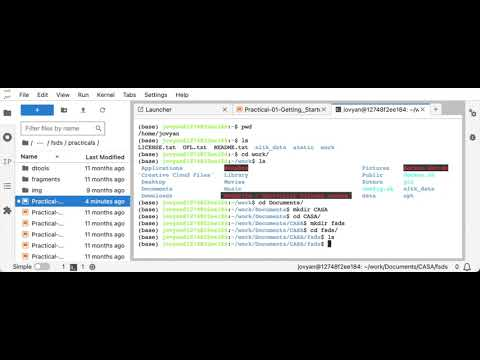

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Fnna4YMdLw4", width=700)

The commands we used were:

| Command        | Means                                                                           |
| :------------- | :------------------------------------------------------------------------------ |
| cd             | Change directory                                                                |
| cd $HOME       | Change to the home directory (you can find out where this is using `echo $HOME` |
| cd Documents   | Change to a directory called Documents in the current location                  |
| ls             | List the files in the current directory                                         |
| mkdir CASA     | Make a directory called `CASA`                                                  |
| touch test.txt | Create an empty file called `test.txt` by 'touching' that file                  |

Note: `$HOME` may not be available on Windows machines; however, the Terminal provided in the SDS2023 container _does_ allow this because it is a full Linux system running on your computer.

<div class="alert alert-block alert-warning">
<b>&#9888; Tip:</b> On some Windows machines you might not have a <tt>Documents</tt> folder and will need to decide whether to create one or use the Windows-equivalent (probably <tt>My\ Documents</tt> -- notice the "<tt>\</tt>" instead of a "<tt>/</tt>").
</div>

<div class="alert alert-block alert-info">
<b>&#9888; Tip:</b> There are any number of ways to organise your CASA work, what's important is that you are <i>logical</i> about things like names and hierarchy. This will make it much easier to access files and notebooks using Docker, Quarto, <i>and</i> Python.
</div>

## Task 3: Setting Up GitHub

Understanding how to use Git and GitHub effectively is a core element of learning to code. So one of the _first_ things that we are going to do is set you up with an account and a new project.

So in order to complete this task you need to:
1. Create a login with [GitHub](https://github.com). 
2. Create a new **private** project on GitHub. 
3. Edit the `README.md` and `.gitignore` files for your new project.
4. Save the changes (this is called a 'commit') and say in a general way what edits you did.
5. Work out how to compare the original and edited versions of any file in your browser.

### 3.1 Your New GitHub Account

You may wish to set up your new GitHub account with your UCL email. GitHub 'knows' about educational users and will give you access to more features for free if you use a `.ac.uk` email address. Once you've done this, you can then link a personal email address as well.

From a security standpoint you should _also_ enable 2-factor authentication so that you receive a text message when you log in on a new machine and are asked to confirm a code.

### 3.2 Creating a Private Repository

To create a repository, click on the `+` at the upper-right corner of the GitHub web page and select `New Repository`. You might as well call your 'repo' `fsds` or `foundations` since that's a lot shorter than `foundations_of_spatial_data_science`. 

<div class="alert alert-block alert-warning">
    <b>&#9888; Note:</b> for the purposes of this tutorial (and all subsequent tutorials) I will assume that your repository is called <tt>fsds</tt>. You can call it whatever you like, in which case you will <em>always</em> need to substitute the name that <em>you</em> chose wherever you see me write <tt>fsds</tt>.
</div>

It's always helpful to provide some basic information about what's in the project (_e.g._ your notes and practicals for the _Foundations_ module). And finally, make sure you:

1. Change the visibility from `Public` to `Private`,
2. Tick `Add a README file`, 
3. Change `Add .gitignore` from `None` to `template: Python`.

Click `Create Repository` and you should end up on a page that looks like this:

![Repository created](https://github.com/jreades/fsds/raw/master/practicals/img/1.1-Repo_Created.png)

Your new repository has been created (on GitHub)!

## Task 4: Updating the .gitignore File

The `.gitignore` file tells Git what files to ignore by default. Unless you _force_ Git to add an ignored file it will happily live in your _local_ repository alongside files that are version-controlled and 'shared' with GitHub.

The Python template for `.gitignore` includes a lot of useful files and folders that we wouldn't want Git to track for us. But it _doesn't_ include data. In your web browser, click on the `.gitignore` file and then the 'pencil' icon on the right to edit it on GitHub. You should see something like this:

![Editing the .gitignore file](https://github.com/jreades/fsds/raw/master/practicals/img/1.4-Editing_Gitignore.png)

### 4.1 Exclude Data Files

We want to make it hard to accidentally add a large data file to our repository. Git/GitHub isn't designed for large, binary files (you can't 'read' a Parquet file) and we assume that data is backed up or available elsewhere, but our _code_ is not! So as a first step we want to exclude files that are likely to just be 'data':

| File Type | Extension |
| :-------- | --------: |
| CSV | `.csv` |
| Excel | `.xls`, `.xlsx` |
| Zip | `.zip` |
| GZip | `.gzip` |
| Feather | `.feather`, `.geofeather` |
| Parquet | `.parquet`, `.geoparquet` |

Here's another hint: `C extensions` are _already_ excluded by the `.gitignore` file, so maybe look to see how that's done to help you figure out how to exlcude `.zip`, `.gz`, and `.csv` files...

### 4.2 Exclude a Data Directory

To make it even _less_ like that we accidentally include data, let's also exclude a `data` directory from our repository. As a clue, nearly everything in the `Distribution / packaging` section of the `.gitignore` file is a directory to be excluded from Git.

So how would you indicate that `data` is a directory? Once you're sure, add the `data` directory! 

When you are done, don't forget to add a 'commit message' (e.g. 'Added data files to .gitignore') at the bottom and then click `Commit changes`.

<div class="alert alert-block alert-info">
    <b>&#9888; Answers</b>: I don't want you to get hung up on this <i>one</i> thing in Practical 1, so if you just can't make sense of what you're being asked to do here, have a look at the <a href="#Answers">Answers</a> at the bottom of this page.
</div>

### 4.3 Check Your Changes

Once you have committed your changes, you should be back to the default view of the `.gitignore` file but there should be a message to the effect of `Latest commit <some hexadecimal number> 10 seconds ago` and, next to that, a `History` button.

Click on 'History' and let's go back in time! 

![The Gitignore history](https://github.com/jreades/fsds/raw/master/practicals/img/1.5-Gitignore_History.png)

On the history page you can browse every edit to your file. Whenever you `commit` a file, this like taking a snapshot at a point in time. Using the 'History' you can compare two different snapshots in order to see what has changed. This would help you to work out how you broke something, check that requested changes have been made, or see how an error might have been introduced.

You can mouseover the buttons to see what they do. Why don't you try to find `See commmit details` and check what edits you made to the `.gitignore` file? Yo ushould see at least _three_ plusses in the history view representing three new lines in the `.gitignore` file.

<div class="alert alert-block alert-info">
<b>&#9888; Tip:</b> You can mouseover the buttons to see what they do. Why don't you try to find `See commmit details` and check what edits you made to the <tt>.gitignore</tt> file? You should see at least <em>three</em> plusses in the history view representing three new lines in the <tt>.gitignore</tt> file.
</div>

## Task 5: Creating Your First Remote File

To get some practice with Markdown let's write up some notes direclty into our GitHub repository (aka 'repo'). You'll notice that we've not yet hit the *BIG GREEN BUTTON* marked `Add a README`... Let's do that now!

This will take you to an editing page for the new `README.md` file. You can type directly into this web page and it will update the repository, but _only_ once you `commit` your edits.

### 5.1 Working on Your Markdown

Write your README file using _at least_ the following Markdown features:

- A level-1 header (`#`)
- A level-3 header (`###`)
- Italic text (`_this is italicised_`)
- Bold text (`**this is bold**`)
- A link (`[link text](url)`)
- An image (`![Alt text](image_location)`)

If you're unsure how these work, just double-click on _this text_ and you'll see Markdown in a Jupyter notebook. Here's some sample text to get you started:

```markdown
## Foundations of Spatial Data Science

This repository contains practicals and notes from the _Foundations_ module. 

You can find the original [here](https://jreades.github.io/fsds/).
```

**Don't forget to check out the "Preview" tab!**

### 5.2 Commiting a Change

Once you're happy with how your text looks and works, it's time to commit! Scroll down to where you see something like this (you will see your _own_ GitHub username, not mine):

![GitHub Commit](https://github.com/jreades/fsds/raw/master/practicals/img/1.2-Commit.png)
  
You can just accept the description (_e.g._ `Create README.md`) or you can write your own. You can also provide an extended description if you choose. Then click `Commit new file` and you will see your new README appear.

## Task 6: Setting Up Git Locally

I have [created a video](https://web.microsoftstream.com/video/29a31977-ff9e-4b53-92d3-ee3bb2a769f6) on Microsoft Streams that runs you through Tasks 6.1 and 6.2 (below). You can refer ot it if you find the written instructions hard to follow for any reason or would like a visual check that you're doing the right thing!

### 6.1 Configuring Defaults

The first thing to do is set up the default username and email for GitHub. These can be changed on a project-by-project basis, but to begin with it's best to set up the _global defaults_. Using either the Terminal or Bash enter the following (replacing `<...>` with _your_ details):
```bash
cd 
git config --global user.email '<your GitHub email address>'
git config --global user.name '<your GibHub username>'
```

### 6.2 Creating a Personal Access Token

You do not want to have to enter your GitHub password every time you copy changes up to/down from GitHub, and you _don't_ want to paste your password in plain text into your code! The Personal Access Token is a way to manage this by issuing special passwords that allow only limited access to your account.

To create a Personal Access Token:

- Visit your GitHub User Page ([e.g. github.com/jreades](https://github.com/jreades))
- Click on your user icon (at the top-right corner of the page) and pick `Settings`
- Scroll down the [settings page](https://github.com/settings/profile) until you get to `Developer settings`
- Click the `Developer settings` link to reach [the 'apps' page](https://github.com/settings/apps) and then click on the `Personal access tokens` link.

<div class="alert alert-block alert-danger">
<b>&#9888; Type of Personal Tokens:</b> You now need to choose the type of token to generate. I <i>personally</i> find the old type of tokens easier to work with because the 'new' fine-grained tokens are intended to support complex workflows when all we're trying to do is allow one computer to push/pull from Git. 
</div>
  
- Click the `Generate new token` button and set up the token so that it has **read/write `repo` privileges (full control of private repositories)**. You can change other settings (read/write packages, gists, and notifications) but this is not necessary.
- Save the resulting token somewhere safe as you will need it again!

<div class="alert alert-block alert-danger">
<b>&#9888; Keep your Personal Token safe:</b> you will need it at least twice in this tutorial and may want to use it again on other computers. You can always create a new one, but then you'll need to update every computer where you access your GitHub repositories.
</div>

### 6.3 Cloning Your Repository

Now we are going to `clone` (i.e. copy) the repository that you just created on to your own computer. This is surprisingly straightforward provided that you have installed the command line tools.

On your private repository page, click on the green button labeled `Code` visible in the screenshot below:

![Screenshot of cloning interface](https://github.com/jreades/i2p/raw/master/lectures/img/Cloning.png)

You should then copy the URL (visible in my screenshot as `https://github.com/jreades/i2p.git`). Switching to the command line, *c*hange *d*irectory (`cd`) to the location where you want your repository to be stored on _your_ machine. For instance, if I wanted to keep all of my _Foundations_ code in the CASA directory then I would do this:

```bash
cd $HOME/work/Documents/CASA/
git clone <the_url_that_you_copied_from_the_browser>
```
The first time that you do this, you will likely need to provide login information. Use your GitHub username and the Personal Access Token that you just created.

### 6.4 Storing Credentials & 'Pulling'

You can now activate the credtial helper that will store your Personal Access Token:
```bash
cd fsds
git config credential.helper store
git pull
```

When you type `git pull` you _should_ be asked _again_ for your username and password. You should (again) use the Personal Access Token as your password. You should not be asked again for pushing or pulling data into this GitHub repository. If you are _not_ asked for your Personal Access Token then this likely means that your token is already saved and ready to use on all future 'actions'.

### 6.5 Adding a Local File to Your Repository

In order to tie together the different concepts covered above, we are now going add Practical 1 (_this_ practical) to _your_ GitHub repo. The easiest way to do this is to open the practicals as `Raw text` in your browser: so navigate to the [Practical 1](https://github.com/jreades/fsds/blob/master/practicals/Practical-01-Getting_Started.ipynb) page on GitHub and then click `Raw` to see something like this:

![Raw view of a Jupyter Notebook](https://github.com/jreades/fsds/raw/master/practicals/img/1.6-Raw_Ipynb.png)

So, starting with the 'raw' notebook:

1. Save this file to your computer as a notebook with the extension `.ipynb`. 
2. Move the file to your repostiory folder (_e.g._ `$HOME/work/Documents/CASA/fsds/`).

<div class="alert alert-block alert-success">
    <b>&#128161; Extensions:</b> It is <em>highly</em> likely that your browser automatically added a <tt>.txt</tt> extension when you saved the Notebook file to your computer. You need to remove that ending to your file name or Jupyter won't be able to run it. You can rename a file by <em>moving</em> (bash: <tt>mv</tt>) from one name to another: <tt>mv <notebook_name>.ipynb.txt <notebook_name.ipynb</tt>
</div>

In the Terminal/Bash we now need `add` this file to Git so that it knows to keep track of it. Unlike Dropbox or OneDrive, just putting a file in a repo directory does _not_ mean that Git will pay attention to it:

```bash
# Assuming that you are 'in' the 'fsds' directory...
git add Practical-01-Getting_Started.ipynb
git commit -m "Adding notebook 1 to repo."
```

<div class="alert alert-block alert-danger">
    <b>&#9888; Remember:</b> Unless you have <em>added</em> and <em>committed</em> a file to Git then it is <em>not</em> version controlled.
</div>

### 6.6 Status Check

We now want to check that the file has been successfully added to Git. We do this with a `status` check in the repository directory (_i.e._ `cd $HOME/work/Documents/CASA/fsds/`):

```bash
git status
```

You should see something like:
```bash
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)
```

This is telling you that your local computer is 1 commit (the one that you _just_ completed) ahead of the 'origin', which is on GitHub. GitHub doesn't _have_ to be the origin (nor does the repository have to be one that we created in order to be an origin) but _conceptually_ and _practically_ it's easier to create new repositories on GitHub and clone them to our computer.

### 6.7 Keep Pushing

To synchronise the changes we just made, let's follow Git's advice:

```bash
git push
```

You should see _something_ like (the numbers and details will _all_ differ, but the messages will be the same):

```bash
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 306 bytes | 306.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
remote: This repository moved. Please use the new location:
remote:   https://github.com/jreades/fsds.git
To https://github.com/jreades/i2p.git
   7410d0e..45aa80a  master -> master
```

If you now go over to your browser and visit your GitHub repo page (_e.g._ `https://github.com/jreades/fsds`) --- pressing the `Reload` button if you had the page open already --- then you should see that the file you added _on your computer_ is also showing up on the GitHub site as well! This means it's now fully version-controlled and backed-up.

<div class="alert alert-block alert-danger">
    <b>&#9888; Remember:</b> Unless have <em>pushed</em> your commits to GitHub they are <em>only</em> stored on <em>your</em> computer. So your files can be properly version-controlled, but without a <em>push</em> if you lose your computer you <em>still</em> lose everything!
</div>

### 6.8 More About Git

From here on out you can keep changes made either directly on GitHub or locally on your computer (or any _other_ computer to which you `clone` your repository) in synch by using `git push` (to _push_ changes from a local computer _up_ to the origin on GitHub) and `git pull` (to _pull_ changes available on the origin _down_ to the local computer).

That said, you can do a _lot_ more than just push/pull to your own repository and [this Twitter thread](https://twitter.com/ChrisStaud/status/1574277175527735296) leads to a lot of useful additional resources to do with Git:

- [Introduction to Version Control with Git](https://programminghistorian.org/en/lessons/retired/getting-started-with-github-desktop) on the Programming Historian web site is written for digital humanities researchers so it's intended to be accessible.
- [Oh My Git](https://ohmygit.org/) is an 'open source game' to help you learn Git.
- [Git Meets Minesweeper?](https://profy.dev/project/github-minesweeper) is apparently a 'thing'.
- [Visual Git Reference](http://marklodato.github.io/visual-git-guide/index-en.html) if you think visually or just want to check your understanding.
- [Version Control with Git](https://swcarpentry.github.io/git-novice/) is a Software Carpentries lesson that takes you quickly through the important elements of getting set up and started. It would be a good refresher.
- [Altassian's Documentation](https://www.atlassian.com/git/tutorials) provides more detailed explanations of the commands and options.
- [Learn Git Branching](https://learngitbranching.js.org) focusses on a key concept for software _collaboration_.
- [Git Immersion](https://gitimmersion.com) provides a 'guided tour' of the fundamentals.

<div class="alert alert-block alert-success">
    <b>&#128161; Tip</b>: For the <a href="https://jreades.github.io/fsds/assessments/group.html">Group Work</a> every member of your group will need to make contributions to a GitHub repository. This will require learning how to invite others to be contributors, how to merge changes, and how to deal with conflicts of the coding kind.
</div>

## Task 7: Using Quarto

Although we have also installed Quarto in the Docker image (see [Task 7](#Task-7:-Getting-Set-Up-with-Docker)), it is easier to use Quarto with fonts if you are running it directly on your computer, so that's what we're going to do now:

1. [Download the Article Summary Template](https://github.com/jreades/sds_env/blob/master/skills/Article_Summary.qmd) and then click on the `Raw` button to access the Markdown.
2. Save it somewhere accessible and rename it if you like (e.g. `$HOME/work/Documents/CASA/fsds/articles/Template.qmd`)

At this point you _should_ be able to turn the template file into a PDF as follows:

```bash
cd $HOME/work/Documents/CASA/fsds/
quarto render articles/Template.qmd 
```

You should then see a number of messages appear and, eventually, 
```bash
Output created: Template.pdf
```

Open this PDF file and you _should_ see the Markdown content from `Template.qmd` converted into a well-formatted, if not particularly attractive, [PDF like this](https://jreades.github.io/sds_env/skills/Article_Summary.pdf). We'll see in later sesesions how to specify fonts and do a good deal more. But this is enough to show that you have quarto installed and running successfully! 

<div class="alert alert-block alert-info">
    <b>&#9888; Notice:</b> we are steadily adding files and directories to the <tt>fsds</tt> folder that we originally created. We have an <tt>articles</tt> folder now (though we have <i>not</i> yet added it to Git. And we have the practical... as time goes on more and more files and folders will live your Git directory!
</div>

To add the articles and template QMD file to Git it's the same process as it was for the practical:

```bash
git add articles # Will automatically add files under articles/
git commit -m "Adding article template"
git push
```

If you visit the GitHub web page for your FSDS repository you should now see this folder and file there as well!

## Other Ways of Using Docker

<div class="alert alert-block alert-warning">
<b>&#9888; Warning</b>: The two techniques below are: 1) advanced; and 2) not essential to using Docker for this module. We will offer limited support for this if we can, but you will be a lower priority for support since these are <em>entirely</em> at your discretion.
</div>

There are two _other_ ways of running Docker:

1. If you have a Mac or have installed a full Linux system for WSL2 (e.g. Ubuntu) on your Windows machine, then there is a 'bash script' and configuration file as [detailed here](https://jreades.github.io/sds_env/docker/#running-everything-script) that we created for you. This is the _easiest_ way to start/stop Docker.
2. Using VSCode as [detailed here](https://jreades.github.io/sds_env/docker/#vscode-integration) to create a new VSCode project that is 'bound' to the Docker image. This will give you a very different experience of using Docker and Jupyter, but is appropriate for _those who want to use an IDE to write code_.

## Other Useful Resources

- [GitHub Markdown Guide](https://guides.github.com/features/mastering-markdown/)
- [Common Mark](https://commonmark.org/help/)
- [Markdown Guide](https://www.markdownguide.org/basic-syntax/), which helpfully includes do's and don'ts.

Finally, these are a bit overkill but the bits about setting up and installing `git`, `bash`/`zsh`, and so on may come in handy later:
- [Setting Up a New Mac](https://www.taniarascia.com/setting-up-a-brand-new-mac-for-development/)
- [Beginner's Guide to Setting Up Windows 10](https://medium.com/@mfosullivan/a-beginners-guide-to-setting-up-a-modern-web-development-environment-on-windows-10-4d75cd94cde8)
- [Setting up Windows without Linux](https://dev.to/jozsefsallai/how-i-ve-set-up-my-windows-machine-as-a-development-environment-without-wsl-2kcl)
- [Microsoft Python Setup Guide](https://docs.microsoft.com/en-us/windows/python/beginners)

# Answers

Normally, I will provide 'answers' later in the week, but for _this_ week it makes sense to provide them right away if you need them...

## .Gitignore

The main thing you should notice is the pattern: `*` means 'anything', while `/` at the end of a line implies a directory. So the following four lines should be added to your `.gitignore` file:

```yaml
*.zip
*.gz
*.csv
*.gzip
*.feather
*.geofeather
*.parquet
*.geoparquet
data/
```

That's it. 

## 